# Ultimate Pig

In [188]:
import math
import random
import matplotlib.pyplot as plt
import statistics as st

In [189]:
%matplotlib inline

In [190]:
class PigGame:
    """
    Responsibilities:
    - Keep track of who is playing
    - Keep track of how many turns have occurred
    - End game if turn limit has been exceeded
    - Record player score
    - Report statistics on game
    - Iterate
    
    Collaborators:
    - Player
    """
    
    def __init__(self, player):
        self.player = player
        self.turn_limit = 7
        self.reset()
        
    def reset(self):
        self.turns = 0
        self.score = 0
        self.turn_scores = []
        
    def iterate(self):
        self.turn_scores.append(self.player.get_move())
        # .get_move() will need to return the score
        self.score += self.turn_scores[-1]
        self.turns += 1
    
    def is_game_over(self):
        if self.turns == self.turn_limit:
            return True
        else:
            return False
    
    def game_stats(self):
        return {
            'turn': self.turns,
            'score': self.score,
            'turn_score': self.turn_scores[self.turns - 1]
        }
    
    def run_pig_sim(self):
        stats = []
        self.reset()
        while not self.is_game_over():
            self.iterate()
            stats.append(self.game_stats())
        return stats
        
        

In [191]:
class Player:
    """
    Responsibilities:
    - Keep track of score during turn
    - Roll dice
    """
    def __init__(self):
        self.turn_score = []

    def roll_dice(self):
        '''Returns random dice roll value'''
        self.turn_score.append(random.randint(1, 6))
            

In [192]:
class ThreeRoller(Player):
    
    def __init__(self):
        super().__init__()
    
    def get_move(self):
        self.turn_score = []
        [self.roll_dice() for _ in range(3)]
        if 1 in self.turn_score:
            return 0
        else:
            return sum(self.turn_score)


In [193]:
class TwoRoller(Player):
    def __init__(self):
        super().__init__()
        
    def get_move(self):
        self.turn_score = []
        [self.roll_dice() for _ in range(2)]
        if 1 in self.turn_score:
            return 0
        else:
            return sum(self.turn_score)

In [194]:
def pig_trials(player, num_trials=10000):
    """
    Run num_trials of with player
    - Returns score, number of 0 score turns for each trial
    """
    trial_stats = []
    for idx in range(num_trials):
        game = PigGame(player)
        game_data = game.run_pig_sim()
        trial_stats.append(game)
    return trial_stats

In [195]:
bernice = ThreeRoller()
angie = TwoRoller()
game1 = PigGame(bernice)
game2 = PigGame(angie)
sim1 = game1.run_pig_sim()
sim2 = game2.run_pig_sim()

In [196]:
print(game1.score)
print(game2.score)
print(sim1)
print(sim2)

22
29
[{'score': 0, 'turn_score': 0, 'turn': 1}, {'score': 0, 'turn_score': 0, 'turn': 2}, {'score': 13, 'turn_score': 13, 'turn': 3}, {'score': 13, 'turn_score': 0, 'turn': 4}, {'score': 13, 'turn_score': 0, 'turn': 5}, {'score': 13, 'turn_score': 0, 'turn': 6}, {'score': 22, 'turn_score': 9, 'turn': 7}]
[{'score': 0, 'turn_score': 0, 'turn': 1}, {'score': 0, 'turn_score': 0, 'turn': 2}, {'score': 0, 'turn_score': 0, 'turn': 3}, {'score': 4, 'turn_score': 4, 'turn': 4}, {'score': 14, 'turn_score': 10, 'turn': 5}, {'score': 22, 'turn_score': 8, 'turn': 6}, {'score': 29, 'turn_score': 7, 'turn': 7}]


In [202]:
angie_data = pig_trials(angie, 1000000)

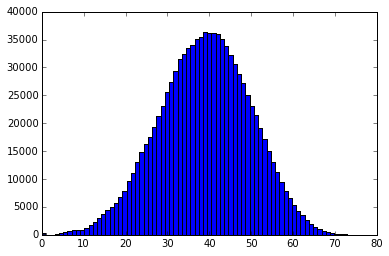

In [229]:
plt.hist([game_data.score for game_data in angie_data], bins = 77)
plt.show()

In [213]:
bernice_data = pig_trials(bernice, 1000000)

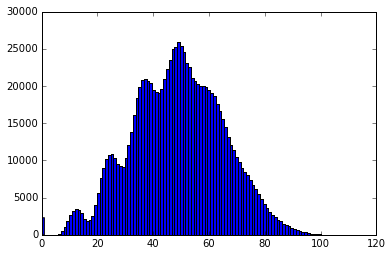

In [228]:
plt.hist([game_data.score for game_data in bernice_data], bins = 110)
plt.show()